In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../scripts")
from TrackReconstruction_functions import *
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker
from reconstruction_functions import *
%matplotlib widget

In [10]:
# diff = "nodiff"
# diff="5percent"
diff="0.05percent"


nubb_meta_1bar  = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_1bar_{diff}_reco.h5",  "meta")
nubb_meta_5bar  = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_5bar_{diff}_reco.h5",  "meta")
nubb_meta_10bar = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_10bar_{diff}_reco.h5", "meta")
nubb_meta_15bar = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_15bar_{diff}_reco.h5", "meta")
nubb_meta_25bar = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_25bar_{diff}_reco.h5", "meta")
# display(nubb_meta_1bar)
# display(nubb_meta_5bar)

Tl_meta_1bar  = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_1bar_{diff}_reco.h5",  "meta")
Tl_meta_5bar  = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_5bar_{diff}_reco.h5",  "meta")
Tl_meta_10bar = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_10bar_{diff}_reco.h5", "meta")
Tl_meta_15bar = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_15bar_{diff}_reco.h5", "meta")
Tl_meta_25bar = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_25bar_{diff}_reco.h5", "meta")
# display(Tl_meta_1bar)
# display(Tl_meta_15bar)

Bi_meta_1bar  = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_1bar_{diff}_reco.h5",  "meta")
Bi_meta_5bar  = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_5bar_{diff}_reco.h5",  "meta")
Bi_meta_10bar = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_10bar_{diff}_reco.h5", "meta")
Bi_meta_15bar = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_15bar_{diff}_reco.h5", "meta")
Bi_meta_25bar = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_25bar_{diff}_reco.h5", "meta")
# display(Bi_meta_1bar)
# display(Bi_meta_15bar)

single_meta_1bar  = pd.read_hdf(f"../data/Trackreco/ATPC_single_1bar_{diff}_reco.h5",  "meta")
single_meta_5bar  = pd.read_hdf(f"../data/Trackreco/ATPC_single_5bar_{diff}_reco.h5",  "meta")
single_meta_10bar = pd.read_hdf(f"../data/Trackreco/ATPC_single_10bar_{diff}_reco.h5", "meta")
single_meta_15bar = pd.read_hdf(f"../data/Trackreco/ATPC_single_15bar_{diff}_reco.h5", "meta")
single_meta_25bar = pd.read_hdf(f"../data/Trackreco/ATPC_single_25bar_{diff}_reco.h5", "meta")


Bkg_meta_1bar  = pd.concat([Tl_meta_1bar,  Bi_meta_1bar,  single_meta_1bar])
Bkg_meta_5bar  = pd.concat([Tl_meta_5bar,  Bi_meta_5bar,  single_meta_5bar])
Bkg_meta_10bar = pd.concat([Tl_meta_10bar, Bi_meta_10bar, single_meta_10bar])
Bkg_meta_15bar = pd.concat([Tl_meta_15bar, Bi_meta_15bar, single_meta_15bar])
Bkg_meta_25bar = pd.concat([Tl_meta_25bar, Bi_meta_25bar, single_meta_25bar])


# Bkg_meta_1bar  = pd.concat([Bi_meta_1bar])
# Bkg_meta_5bar  = pd.concat([Bi_meta_5bar])
# Bkg_meta_10bar = pd.concat([Bi_meta_10bar])
# Bkg_meta_15bar = pd.concat([Bi_meta_15bar])
# Bkg_meta_25bar = pd.concat([Bi_meta_25bar])



In [11]:
num_nubb_1bar  = len(nubb_meta_1bar.event_id.unique())
num_nubb_5bar  = len(nubb_meta_5bar.event_id.unique())
num_nubb_10bar = len(nubb_meta_10bar.event_id.unique())
num_nubb_15bar = len(nubb_meta_15bar.event_id.unique())
num_nubb_25bar = len(nubb_meta_25bar.event_id.unique())

num_Bkg_1bar  = len(Bkg_meta_1bar.event_id.unique())
num_Bkg_5bar  = len(Bkg_meta_5bar.event_id.unique())
num_Bkg_10bar = len(Bkg_meta_10bar.event_id.unique())
num_Bkg_15bar = len(Bkg_meta_15bar.event_id.unique())
num_Bkg_25bar = len(Bkg_meta_25bar.event_id.unique())

num_Bi_1bar  = len(Bi_meta_1bar.event_id.unique())
num_Bi_5bar  = len(Bi_meta_5bar.event_id.unique())
num_Bi_10bar = len(Bi_meta_10bar.event_id.unique())
num_Bi_15bar = len(Bi_meta_15bar.event_id.unique())
num_Bi_25bar = len(Bi_meta_25bar.event_id.unique())

num_Tl_1bar  = len(Tl_meta_1bar.event_id.unique())
num_Tl_5bar  = len(Tl_meta_5bar.event_id.unique())
num_Tl_10bar = len(Tl_meta_10bar.event_id.unique())
num_Tl_15bar = len(Tl_meta_15bar.event_id.unique())
num_Tl_25bar = len(Tl_meta_25bar.event_id.unique())

num_single_1bar  = len(single_meta_1bar.event_id.unique())
num_single_5bar  = len(single_meta_5bar.event_id.unique())
num_single_10bar = len(single_meta_10bar.event_id.unique())
num_single_15bar = len(single_meta_15bar.event_id.unique())
num_single_25bar = len(single_meta_25bar.event_id.unique())


sf_nubb_1bar  = 1
sf_nubb_5bar  = num_nubb_1bar/num_nubb_5bar
sf_nubb_10bar = num_nubb_1bar/num_nubb_10bar
sf_nubb_15bar = num_nubb_1bar/num_nubb_15bar
sf_nubb_25bar = num_nubb_1bar/num_nubb_25bar
sf_Bkg_1bar   = num_nubb_1bar/num_Bkg_1bar
sf_Bkg_5bar   = num_nubb_1bar/num_Bkg_5bar
sf_Bkg_10bar  = num_nubb_1bar/num_Bkg_10bar
sf_Bkg_15bar  = num_nubb_1bar/num_Bkg_15bar
sf_Bkg_25bar  = num_nubb_1bar/num_Bkg_25bar

print("tot, scale fact nubb 1bar:",  num_nubb_1bar,  sf_nubb_1bar)
print("tot, scale fact nubb 5bar:",  num_nubb_5bar,  sf_nubb_5bar)
print("tot, scale fact nubb 10bar:", num_nubb_10bar, sf_nubb_10bar)
print("tot, scale fact nubb 15bar:", num_nubb_15bar, sf_nubb_15bar)
print("tot, scale fact nubb 25bar:", num_nubb_25bar, sf_nubb_25bar)

print("\n")
print("tot events Bi 1bar:",  num_Bi_1bar)
print("tot events Bi 5bar:",  num_Bi_5bar)
print("tot events Bi 10bar:", num_Bi_10bar)
print("tot events Bi 15bar:", num_Bi_15bar)
print("tot events Bi 25bar:", num_Bi_25bar)


print("\n")
print("tot events Tl 1bar:",  num_Tl_1bar)
print("tot events Tl 5bar:",  num_Tl_5bar)
print("tot events Tl 10bar:", num_Tl_10bar)
print("tot events Tl 15bar:", num_Tl_15bar)
print("tot events Tl 25bar:", num_Tl_25bar)

print("\n")
print("tot, scale fact Bkg 1bar:",  num_Bkg_1bar,  sf_Bkg_1bar)
print("tot, scale fact Bkg 5bar:",  num_Bkg_5bar,  sf_Bkg_5bar)
print("tot, scale fact Bkg 10bar:", num_Bkg_10bar, sf_Bkg_10bar)
print("tot, scale fact Bkg 15bar:", num_Bkg_15bar, sf_Bkg_15bar)
print("tot, scale fact Bkg 25bar:", num_Bkg_25bar, sf_Bkg_25bar)

tot, scale fact nubb 1bar: 192298 1
tot, scale fact nubb 5bar: 195130 0.9854865986778045
tot, scale fact nubb 10bar: 194462 0.9888718618547583
tot, scale fact nubb 15bar: 194426 0.9890549617849465
tot, scale fact nubb 25bar: 188725 1.0189323089150881


tot events Bi 1bar: 199084
tot events Bi 5bar: 309515
tot events Bi 10bar: 358238
tot events Bi 15bar: 379236
tot events Bi 25bar: 389318


tot events Tl 1bar: 195184
tot events Tl 5bar: 237926
tot events Tl 10bar: 207018
tot events Tl 15bar: 219388
tot events Tl 25bar: 206300


tot, scale fact Bkg 1bar: 594825 0.32328499978985414
tot, scale fact Bkg 5bar: 730594 0.2632077460258365
tot, scale fact Bkg 10bar: 752667 0.2554888151068135
tot, scale fact Bkg 15bar: 786856 0.24438779141291417
tot, scale fact Bkg 25bar: 781714 0.24599533844858862


Running cuts with
Pressure: 5 bar
Diffusion: 0.05percent


/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:653: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  if (uselog): axs[4,1].semilogy()
/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:664: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[5,0].semilogy()
/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:673: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  if (uselog): axs[5,1].semilogy()
/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:720: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


Running cuts with
Pressure: 1 bar
Diffusion: 0.05percent


/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:671: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[5,1].set_xticks(bin_centers) ;
/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:720: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


Running cuts with
Pressure: 10 bar
Diffusion: 0.05percent


/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:671: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[5,1].set_xticks(bin_centers) ;
/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:720: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


Running cuts with
Pressure: 15 bar
Diffusion: 0.05percent


/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:671: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[5,1].set_xticks(bin_centers) ;
/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:720: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


Running cuts with
Pressure: 25 bar
Diffusion: 0.05percent


/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:671: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[5,1].set_xticks(bin_centers) ;
/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:720: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


Running cuts with
Pressure: 1 bar
Diffusion: 0.05percent


/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:671: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[5,1].set_xticks(bin_centers) ;
/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:720: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


Running cuts with
Pressure: 5 bar
Diffusion: 0.05percent


/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:671: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[5,1].set_xticks(bin_centers) ;
/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:720: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


Running cuts with
Pressure: 10 bar
Diffusion: 0.05percent


/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:671: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[5,1].set_xticks(bin_centers) ;
/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:720: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


Running cuts with
Pressure: 15 bar
Diffusion: 0.05percent


/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:671: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[5,1].set_xticks(bin_centers) ;
/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:720: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


Running cuts with
Pressure: 25 bar
Diffusion: 0.05percent


/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:671: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[5,1].set_xticks(bin_centers) ;
/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/reconstruction_functions.py:720: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


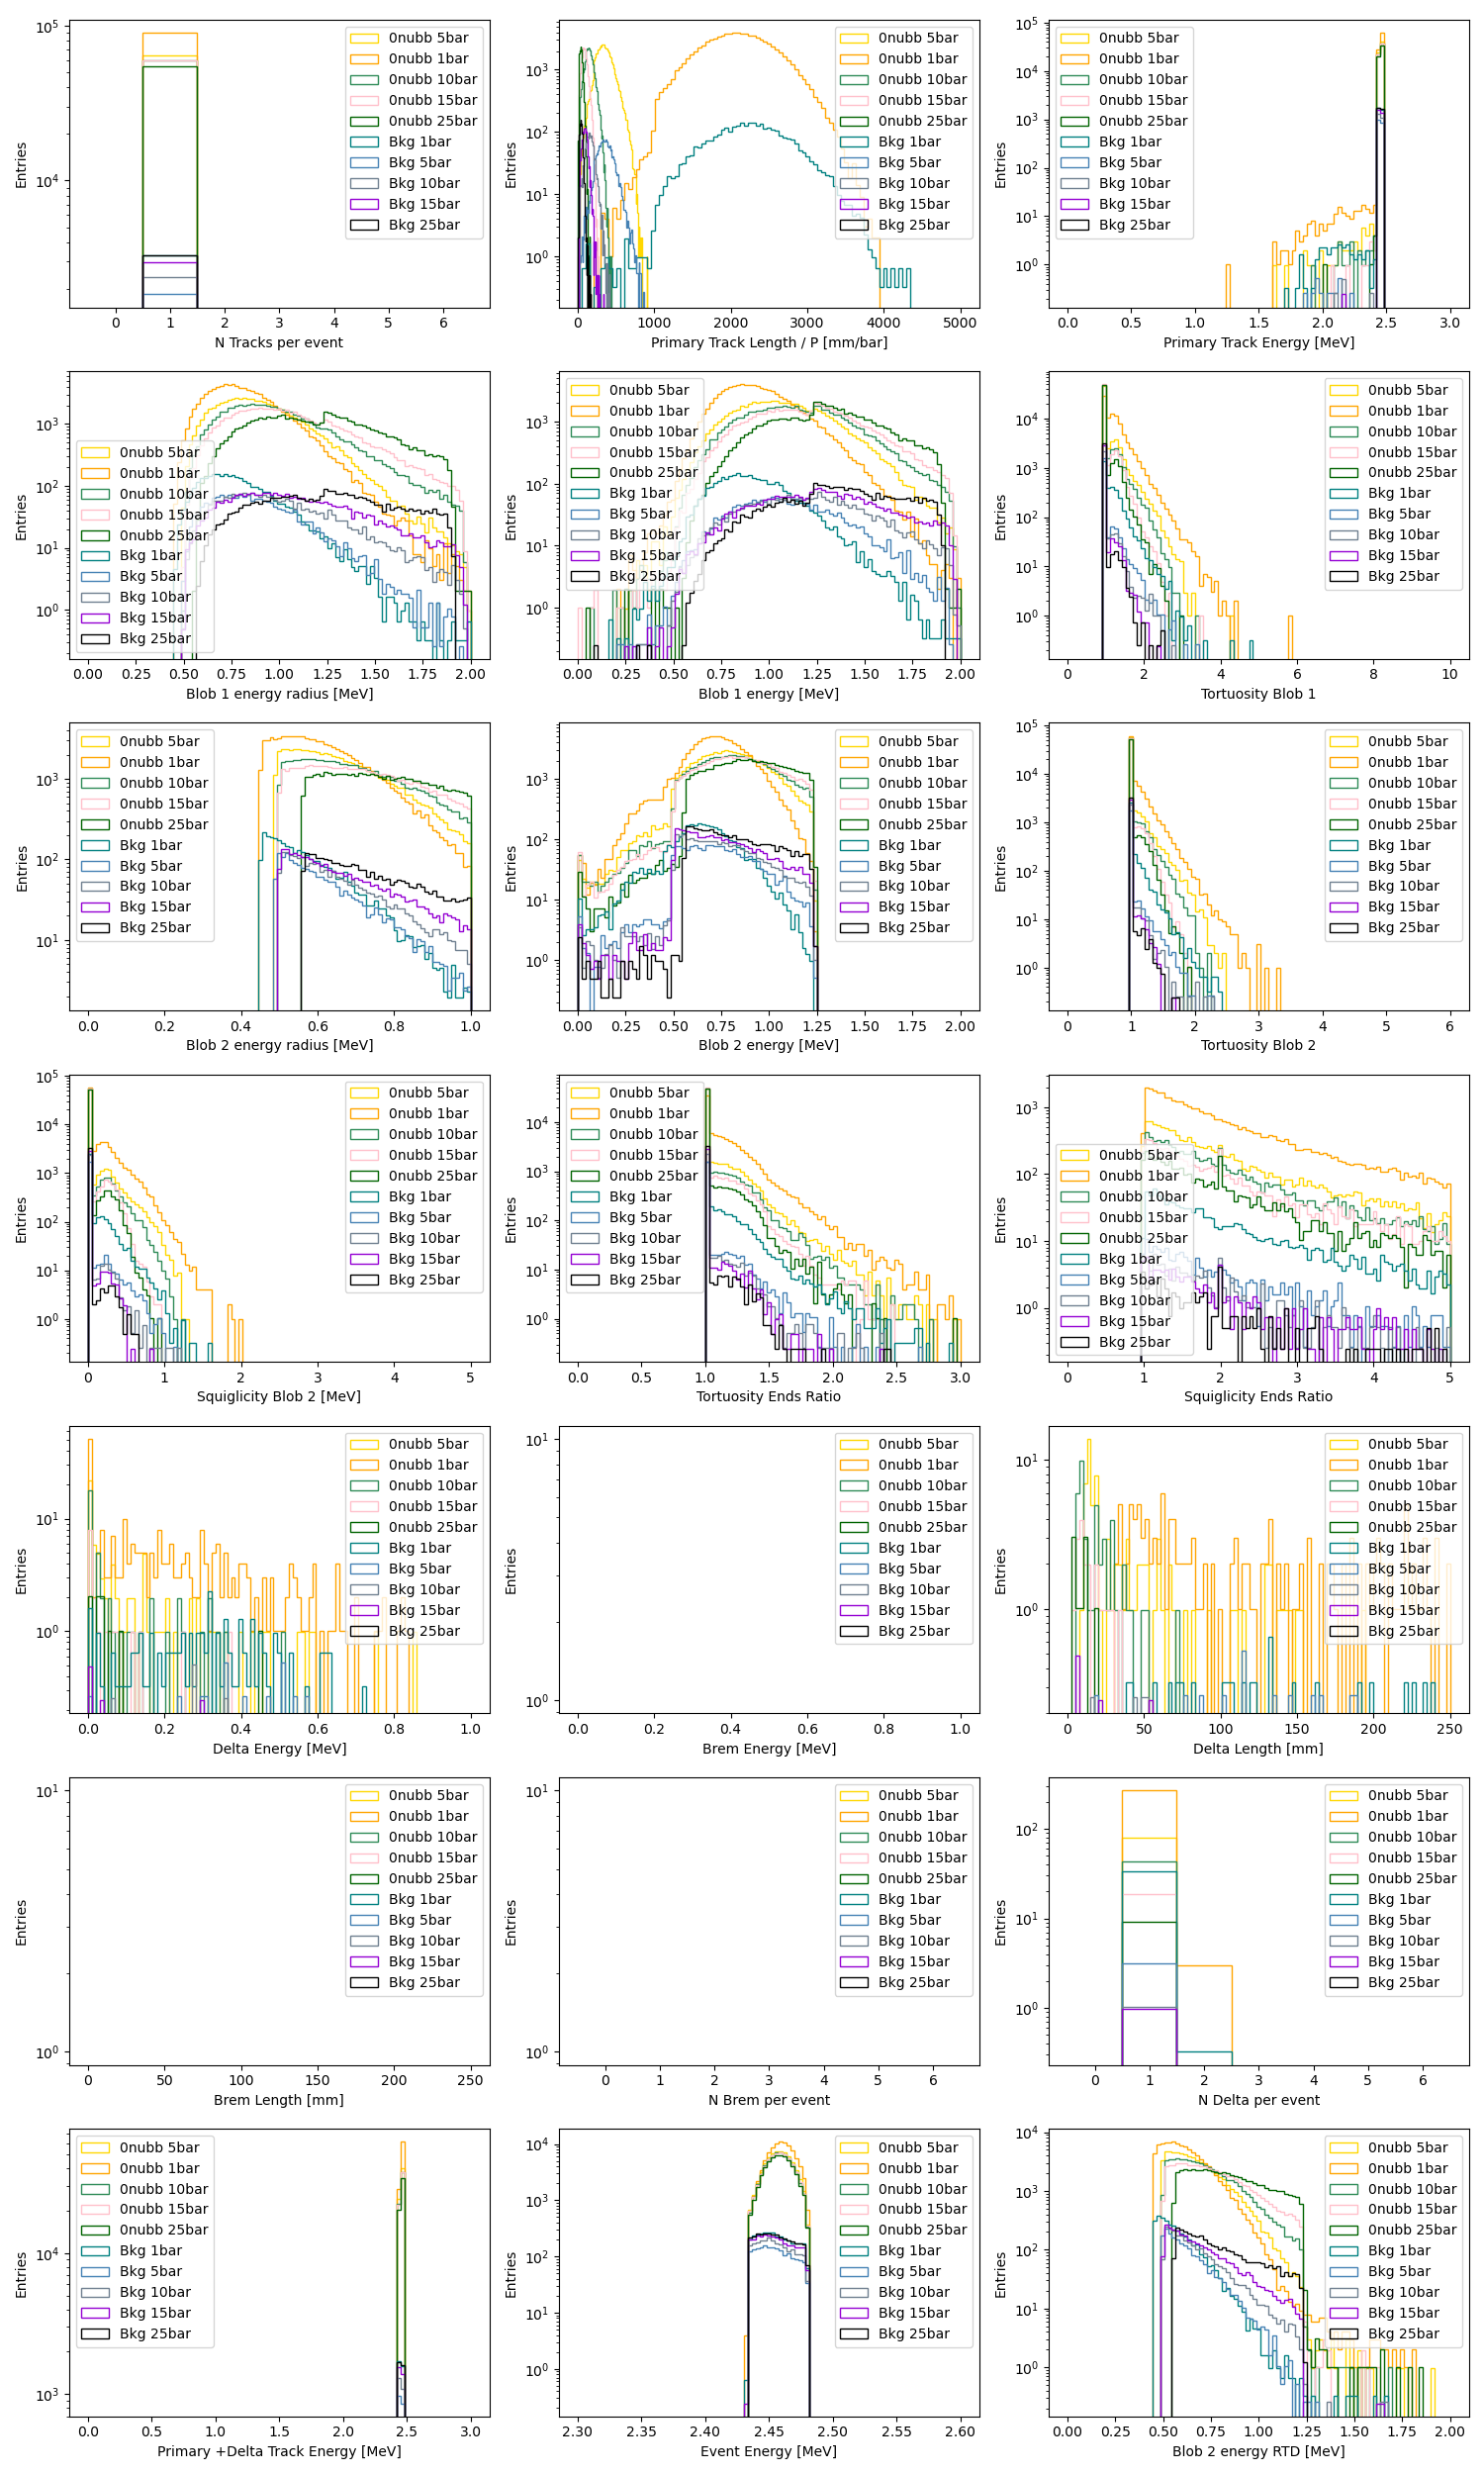

In [12]:
# Plot some variables like number of tracks
%matplotlib widget

mode = "next1t"

fig, axs = plt.subplots(7, 3, figsize=(15, 25))
num_nubb_5bar_cut  = PlotDistributions(nubb_meta_5bar,  "gold",     "0nubb 5bar",  5,  diff, mode,  1.0, sf_nubb_5bar,  axs, True)
num_nubb_1bar_cut  = PlotDistributions(nubb_meta_1bar,  "orange",   "0nubb 1bar",  1,  diff, mode,  1.0, sf_nubb_1bar,  axs, True)
num_nubb_10bar_cut = PlotDistributions(nubb_meta_10bar, "seagreen", "0nubb 10bar", 10, diff, mode,  1.0, sf_nubb_10bar, axs, True)
num_nubb_15bar_cut = PlotDistributions(nubb_meta_15bar, "Pink",     "0nubb 15bar", 15, diff, mode,  1.0, sf_nubb_15bar, axs, True)
num_nubb_15bar_cut = PlotDistributions(nubb_meta_25bar, "darkgreen","0nubb 25bar", 25, diff, mode,  1.0, sf_nubb_25bar, axs, True)

num_Bkg_1bar_cut  = PlotDistributions(Bkg_meta_1bar,  "Teal",       "Bkg 1bar",  1,  diff, mode, 1.0, sf_Bkg_1bar,  axs, True)
num_Bkg_5bar_cut  = PlotDistributions(Bkg_meta_5bar,  "steelblue",  "Bkg 5bar",  5,  diff, mode, 1.0, sf_Bkg_5bar,  axs, True)
num_Bkg_10bar_cut = PlotDistributions(Bkg_meta_10bar, "slategray",  "Bkg 10bar", 10, diff, mode, 1.0, sf_Bkg_10bar, axs, True)
num_Bkg_15bar_cut = PlotDistributions(Bkg_meta_15bar, "darkviolet", "Bkg 15bar", 15, diff, mode, 1.0, sf_Bkg_15bar, axs, True)
num_Bkg_15bar_cut = PlotDistributions(Bkg_meta_25bar, "k",          "Bkg 25bar", 25, diff, mode, 1.0, sf_Bkg_25bar, axs, True)


<>:126: SyntaxWarning: invalid escape sequence '\%'
<>:126: SyntaxWarning: invalid escape sequence '\%'
/var/folders/cf/0fb79lcx5z9by5185swm__x00000gr/T/ipykernel_30981/3627906507.py:126: SyntaxWarning: invalid escape sequence '\%'
  print(f"\\caption{{Performance table for an energy resolution cut of {E_res}\%, {diff}, and {mode_label} xenon detector.}}")


On Pressure 1
Correcting Efficiency by factor  0.532
Efficiency nubb: 24.847  +/- 0.114 %
Bkg Rej: Bkg: 1.719 +/- 0.017 %      (bkg rej == 98.281 %)
On Pressure 5
Correcting Efficiency by factor  0.74
Efficiency nubb: 24.835  +/- 0.107 %
Bkg Rej: Bkg: 0.96 +/- 0.011 %      (bkg rej == 99.04 %)
On Pressure 10
Correcting Efficiency by factor  0.806
Efficiency nubb: 25.089  +/- 0.105 %
Bkg Rej: Bkg: 1.242 +/- 0.013 %      (bkg rej == 98.758 %)
On Pressure 15
Correcting Efficiency by factor  0.835
Efficiency nubb: 25.772  +/- 0.105 %
Bkg Rej: Bkg: 1.542 +/- 0.014 %      (bkg rej == 98.458 %)
On Pressure 25
Correcting Efficiency by factor  0.876
Efficiency nubb: 24.746  +/- 0.104 %
Bkg Rej: Bkg: 1.725 +/- 0.015 %      (bkg rej == 98.275 %)
On Pressure 1
Correcting Efficiency by factor  0.532
Efficiency nubb: 24.847  +/- 0.114 %
Bkg Rej: Bkg: 1.668 +/- 0.029 %      (bkg rej == 98.332 %)
On Pressure 5
Correcting Efficiency by factor  0.74
Efficiency nubb: 24.835  +/- 0.107 %
Bkg Rej: Bkg: 0.7

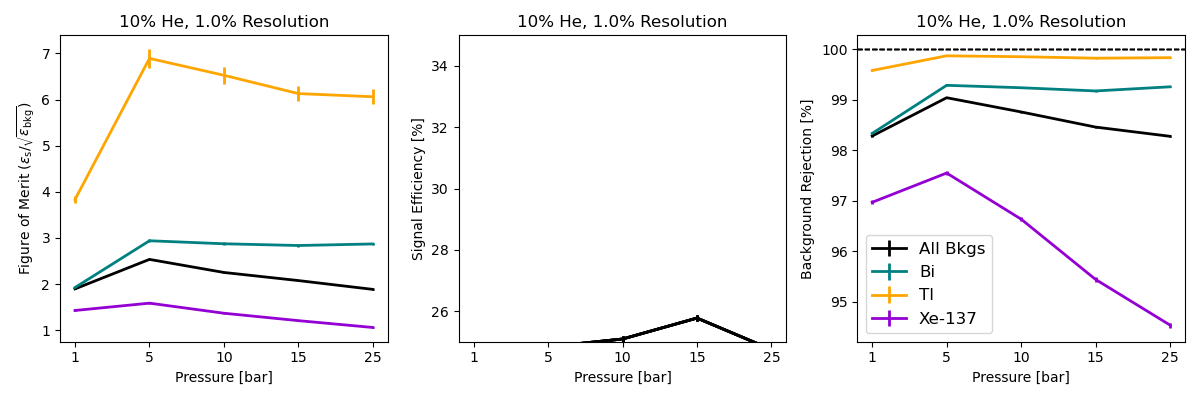

In [13]:
nubb_meta   = [nubb_meta_1bar,    nubb_meta_5bar,    nubb_meta_10bar,    nubb_meta_15bar,   nubb_meta_25bar]
Bkg_meta    = [Bkg_meta_1bar,     Bkg_meta_5bar,     Bkg_meta_10bar,     Bkg_meta_15bar,    Bkg_meta_25bar]
Bi_meta     = [Bi_meta_1bar,      Bi_meta_5bar,      Bi_meta_10bar,      Bi_meta_15bar,     Bi_meta_25bar]
Tl_meta     = [Tl_meta_1bar,      Tl_meta_5bar,      Tl_meta_10bar,      Tl_meta_15bar,     Tl_meta_25bar]
single_meta = [single_meta_1bar,  single_meta_5bar,  single_meta_10bar,  single_meta_15bar, single_meta_25bar]

num_nubb    = [num_nubb_1bar,   num_nubb_5bar,   num_nubb_10bar,   num_nubb_15bar,   num_nubb_25bar]
num_Bkg     = [num_Bkg_1bar,    num_Bkg_5bar,    num_Bkg_10bar,    num_Bkg_15bar,    num_Bkg_25bar]
num_Bi      = np.array([num_Bi_1bar,     num_Bi_5bar,     num_Bi_10bar,     num_Bi_15bar,     num_Bi_25bar])
num_Tl      = np.array([num_Tl_1bar,     num_Tl_5bar,     num_Tl_10bar,     num_Tl_15bar,     num_Tl_25bar])
num_single  = np.array([num_single_1bar, num_single_5bar, num_single_10bar, num_single_15bar, num_single_25bar])

cols = ["k", "Teal", "Orange", "darkviolet", "Pink"]
pressures_label = ["1", "5", "10", "15", "25"]
pressures = [1, 5, 10, 15, 25]

def Calc_FOM_err(fom, eff, eff_err, bkg, bkg_err):
    return fom*np.sqrt( (eff_err/eff)**2 + 0.25*(bkg_err/bkg)**2)

mode = "enr"
# mode = "nat"
mode = "next1t"


if mode == "enr":
    mass = 1
    selection = "enr"
    mode_label = "enriched"
elif mode == "next1t":
    mass = 1
    selection = "next1t"
    mode_label = "enriched"
else:
    mass = 10
    selection = "nat"
    mode_label = "natural"


def PlotPerformance(nubb_meta, num_nubb, Bkg_meta, num_Bkg, E_res, diff, col_index, labels):

    fom = []
    fom_err = []
    eff = []
    eff_err = []
    Bkg_eff = []
    Bkg_err = []

    # Loop over pressures
    for index in range(len(nubb_meta)):
        print("On Pressure", pressures_label[index])
        nubb_cut = ApplyCutsnoPlot(nubb_meta[index], pressures[index], diff, selection, E_res)
        Bkg_cut  = ApplyCutsnoPlot(Bkg_meta[index],  pressures[index], diff, selection, E_res)
        
        nubb_eff, nubb_err =  CalcEfficiency(nubb_cut, num_nubb[index], "nubb", pressures[index], mass)
        eff.append(100*nubb_eff)
        eff_err.append(100*nubb_err)
        
        Bkg_eff_, Bkg_err_ =  CalcEfficiency(Bkg_cut, num_Bkg[index], "Bkg", pressures[index], mass)
        Bkg_eff.append(100-100*Bkg_eff_)
        Bkg_err.append(100*Bkg_err_)

        fom.append(FOM(nubb_eff,  Bkg_eff_))
        fom_err.append(Calc_FOM_err(fom[index], nubb_eff, nubb_err, Bkg_eff_, Bkg_err_))

    axs[0].errorbar(pressures_label, fom, fom_err, color=cols[col_index], linewidth = 2, label =f"{labels[col_index]}")
    axs[0].set_xlabel("Pressure [bar]")
    axs[0].set_ylabel(r"Figure of Merit ($\epsilon_{\mathrm{s}}/\sqrt{\epsilon_{\mathrm{bkg}}}$)")

    axs[1].errorbar(pressures_label, eff, eff_err, color="k", linewidth = 2, label =f"{labels[col_index]}")
    axs[1].set_xlabel("Pressure [bar]")
    axs[1].set_ylabel("Signal Efficiency [%]")
    axs[1].set_ylim(25,35)

    axs[2].errorbar(pressures_label, Bkg_eff, Bkg_err, color=cols[col_index], linewidth = 2, label =f"{labels[col_index]}")
    axs[2].set_xlabel("Pressure [bar]")
    axs[2].set_ylabel("Background Rejection [%]")


    # axs[0].legend(fontsize=12)
    # axs[1].legend(fontsize=12)
    axs[2].legend(fontsize=12)
    axs[2].axhline(y=100, color='k', linestyle='--', linewidth=1)

    if (diff == "nodiff"):
        axs[0].set_title(f"No Diffusion {E_res}% Resolution", fontsize=12)
        axs[1].set_title(f"No Diffusion {E_res}% Resolution", fontsize=12)
        axs[2].set_title(f"No Diffusion {E_res}% Resolution", fontsize=12)
    elif (diff == "0.05percent"):
        axs[0].set_title(f"10% He, {E_res}% Resolution", fontsize=12)
        axs[1].set_title(f"10% He, {E_res}% Resolution", fontsize=12)
        axs[2].set_title(f"10% He, {E_res}% Resolution", fontsize=12)
    else:
        axs[0].set_title(f"5% CO2, {E_res}% Resolution", fontsize=12)
        axs[1].set_title(f"5% CO2, {E_res}% Resolution", fontsize=12)
        axs[2].set_title(f"5% CO2, {E_res}% Resolution", fontsize=12)

    plt.tight_layout()

    return eff, 1 - np.array(Bkg_eff)/100, fom

labels=["All Bkgs", "Bi", "Tl", "Xe-137"]

for E_res in [1.0]:

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    eff, bkg_perf_all, fom_all       = np.array(PlotPerformance(nubb_meta, num_nubb, Bkg_meta, num_Bkg, E_res, diff, 0, labels))
    eff, bkg_perf_Bi, fom_Bi         = np.array(PlotPerformance(nubb_meta, num_nubb, Bi_meta, num_Bi, E_res, diff, 1, labels))
    eff, bkg_perf_Tl, fom_Tl         = np.array(PlotPerformance(nubb_meta, num_nubb, Tl_meta, num_Tl, E_res, diff, 2, labels))
    eff, bkg_perf_single, fom_single = np.array(PlotPerformance(nubb_meta, num_nubb, single_meta, num_single, E_res, diff, 3, labels))


    # Print a latex table
    print(r"\begin{table}[h!]")
    print(r"\centering")
    print(r"\resizebox{\columnwidth}{!}{%")
    print(r"\begin{tabular}{|c|c||T|T||O|O||V|V||c|c|}")
    print(r"\hline")
    print(r"\textbf{Pressure [bar]} & \textbf{Sig. Eff} & \textbf{Bkg. Eff Bi} & \textbf{F.O.M. Bi} & \textbf{Bkg. Eff Tl} & \textbf{F.O.M. Tl} & \textbf{Bkg. Eff Single} & \textbf{F.O.M. Single} & \textbf{Bkg. Eff Tot} & \textbf{F.O.M. Tot} \\")
    print(r"\hline")
    for p, e, Bi, fBi, Tl, fTl, Sin, fSin, b, f in zip(pressures_label, eff, bkg_perf_Bi, fom_Bi, bkg_perf_Tl, fom_Tl, bkg_perf_single, fom_single, bkg_perf_all, fom_all):
        print(f"{p} & {e/100.:.3f} & {Bi:.5f} & {fBi:.1f} & {Tl:.5f} & {fTl:.1f} & {Sin:.5f} & {fSin:.1f} & {b:.5f} & {f:.1f} \\\\")
    print(r"\hline")
    print(r"\end{tabular}")
    print(r"}")
    print(f"\\caption{{Performance table for an energy resolution cut of {E_res}\%, {diff}, and {mode_label} xenon detector.}}")
    print(f"\\label{{tab:performance_{mode}_{E_res}_{diff}}}")
    print(r"\end{table}")


    if (E_res == 1.0):
        plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Performance_1percent_pressure_{mode}_{diff}.pdf")
        bkg_perf_all_1    = bkg_perf_all
        bkg_perf_Bi_1     = bkg_perf_Bi
        bkg_perf_Tl_1     = bkg_perf_Tl
        bkg_perf_single_1 = bkg_perf_single
    else:
        plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Performance_0.5percent_pressure_{mode}_{diff}.pdf")

In [14]:
print(100* (1-bkg_perf_Bi))
print(1/bkg_perf_all)
print(bkg_perf_Bi)
print(bkg_perf_Tl)
print(bkg_perf_single)

[98.33185992 99.28565659 99.2373785  99.17386535 99.25613509]
[ 58.17928404 104.14739843  80.49914439  64.84186238  57.96915091]
[0.0166814  0.00714343 0.00762621 0.00826135 0.00743865]
[0.00420629 0.00129872 0.00147813 0.00176856 0.00166747]
[0.03032478 0.02452864 0.03366912 0.04561806 0.05466849]


In [15]:


if mode == "enr":
    # This defined the number of generated events in the original sample
    Bi_gen = np.array([30000000000, 6300000000, 3000000000, 1920000000, 1080000000])
    Tl_gen = np.array([2068620000,  509660000,  259738002,  209930000,  149950000])
    single_gen = np.array([20817390, 13744800, 13004290, 12685064, 12142601])


    # Define the number of events in original sample to the number of events in the reco file
    Bi_window_gen = np.array([204082, 311027, 359954, 382152, 401039])
    Tl_window_gen = np.array([195184, 238263, 207799, 221125, 213114])
    single_window_gen = np.array([200595, 195925, 187777, 193937, 189561])
else:
    # This defined the number of generated events in the original sample
    Bi_gen = np.array([100000000, 100000000, 100000000, 100000000, 100000000])
    Tl_gen = np.array([10000000,  10000000,  10000000,  10000000,  10000000])
    single_gen = np.array([2455900, 183850, 1545000, 189822, 1335000])


    # Define the number of events in original sample to the number of events in the reco file
    Bi_window_gen = np.array([2875, 19738, 41342, 60386, 95248])
    Tl_window_gen = np.array([3105, 10698, 15350, 17547, 20589])
    single_containment_corr = np.array([69.0/53.2, 82.8/74.0, 87.2/80.6, 89.8/83.5, 92.0/87.6 ])
    single_window_gen = np.array([185034, 195925, 193298, 193937, 184586])*single_containment_corr

print(Bi_window_gen[4]/Bi_gen[4])

# This defines the reconstruction efficiency
Reco_eff_Bi = num_Bi/Bi_window_gen
Reco_eff_Tl = num_Tl/Tl_window_gen
Reco_eff_single = num_single/single_window_gen

single_gen = single_gen/Reco_eff_single
Bi_window_gen = Bi_window_gen*0.37/Reco_eff_Bi
Tl_window_gen = Tl_window_gen*0.37/Reco_eff_Tl


print(Bi_window_gen/Bi_gen)


0.00095248
[1.53617631e-07 4.65721527e-06 1.76527771e-05 3.55766206e-05
 8.62201891e-05]


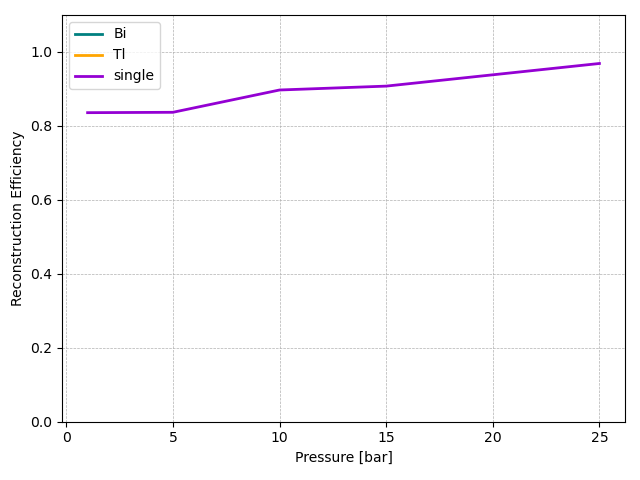

In [16]:
fig, ax1 = plt.subplots()
ax1.plot(pressures, Reco_eff_Bi, color = "Teal", linewidth = 2, label = "Bi")
ax1.plot(pressures, Reco_eff_Tl, color = "Orange", linewidth = 2, label = "Tl")
ax1.plot(pressures, Reco_eff_single, color = "darkviolet", linewidth = 2, label = "single")
ax1.set_xlabel("Pressure [bar]")
ax1.set_ylabel("Reconstruction Efficiency")
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.tick_params(which='minor', length=4, color='gray')
# ax1.set_title(diff)
ax1.legend()
fig.tight_layout()
plt.ylim(0.,1.1)
plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/RecoEff_{mode}_{diff}.pdf")

Mode is natural!

Bi
Copper Mass: 915115.3442359942
Rej factor 0.016681400815736103 1.5361763125113019e-07
Pressure:  1  Acceptance: 2.562557279264051e-09 Activity [muBq] 0.0030016454230248632 Rate 0.009466937065740519
Copper Mass: 316961.75524547015
Rej factor 0.007143434082354627 4.657215265172931e-06
Pressure:  5  Acceptance: 3.326851025409856e-08 Activity [muBq] 0.013497402117812484 Rate 0.042569645031478295
Copper Mass: 201251.75255854861
Rej factor 0.007626214974402523 1.7652777111305888e-05
Pressure:  10  Acceptance: 1.3462387314603107e-07 Activity [muBq] 0.034679411720778854 Rate 0.10938296150741553
Copper Mass: 148922.43622439497
Rej factor 0.008261346496640565 3.557662058770792e-05
Pressure:  15  Acceptance: 2.939107898545714e-07 Activity [muBq] 0.05602548589795708 Rate 0.18684690912552654
Copper Mass: 110808.920061108
Rej factor 0.007438649124879904 8.622018906087057e-05
Pressure:  25  Acceptance: 6.413617339046246e-07 Activity [muBq] 0.09096780941118869 Rate 0.2867223448541

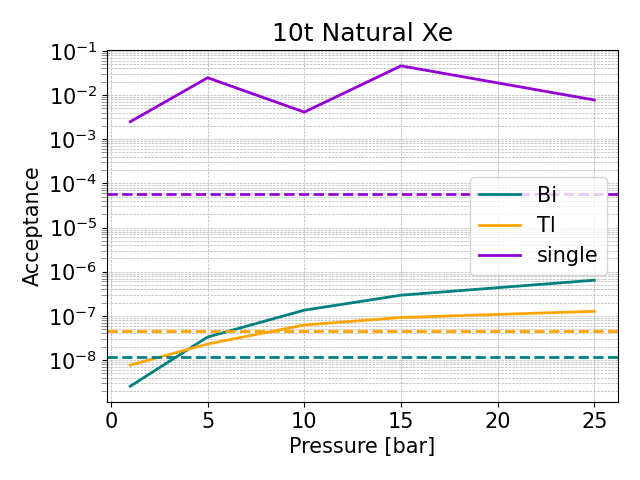

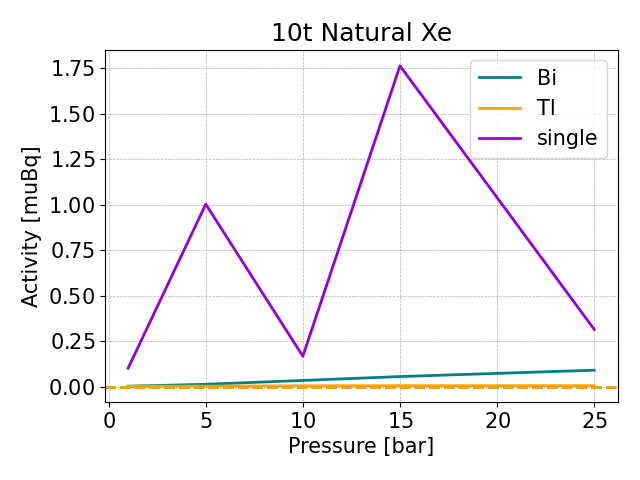

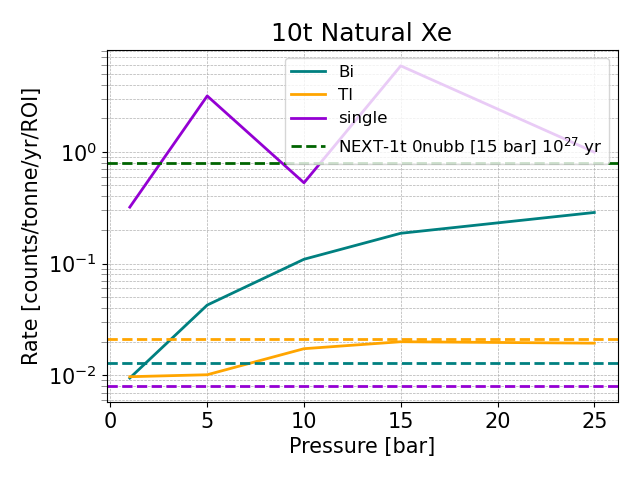

In [17]:
# Make a plot of the expected rate accounting for natural radioactivity
plt.rcParams.update({'font.size': 15})

def CalcMassCylinder(det_size, thick):
    rho_Cu   = 8960 # kg/m^3x
    return np.pi*0.25*rho_Cu * ( (det_size+2*thick)**3 - det_size**3 )


def CalcAcceptance(p, det_size, Ngen, Nwin, Reco_eff, Rej, BR, A_bkg, mode, enrichment, mass):
    # A_bkg = Activity of background muBq/kg e.g. of Cu or Xe-137
    rho_Xe = 5.987 # kg/m3
    M_Xe = mass * enrichment * rho_Xe * p * np.pi*0.25*det_size**3/1e3 # tonne
    MCu = CalcMassCylinder(det_size, 12e-2)
    print("Copper Mass:", MCu)
    print("Rej factor", Rej, Nwin / Ngen )

    Acceptance = Rej * Nwin / Ngen 
    # Acceptance = Nwin / Ngen 

    if (mode == "single"):
        Activity = Acceptance * A_bkg * M_Xe * BR # muBq
    else:
        Activity = Acceptance * A_bkg * MCu * BR # muBq
    
    Rate = 1e-6*Activity * 24*3600*365/M_Xe

    print("Pressure: ",p, " Acceptance:", Acceptance, "Activity [muBq]", Activity, "Rate", Rate)


    return Acceptance, Activity, Rate


if mode == "enr":
    print("Mode is enriched!")
    mass = 1
    enrichment = 0.9
    title = "1t Enriched Xe"
    detsizes = np.array([6.182, 3.615, 2.870, 2.507, 2.114])
else:
    print("Mode is natural!")
    mass = 10
    enrichment = 0.09
    title = "10t Natural Xe"
    detsizes = np.array([13.319, 7.789, 6.182, 5.301, 4.556])


print("\nBi")
Acceptance_1bar_Bi,  Activity_1bar_Bi,  Rate_1bar_Bi  = CalcAcceptance(1,  detsizes[0], Bi_gen[0], Bi_window_gen[0], Reco_eff_Bi[0], bkg_perf_Bi[0], 1.0, 1.28, "Bi", enrichment, mass)
Acceptance_5bar_Bi,  Activity_5bar_Bi,  Rate_5bar_Bi  = CalcAcceptance(5,  detsizes[1], Bi_gen[1], Bi_window_gen[1], Reco_eff_Bi[1], bkg_perf_Bi[1], 1.0, 1.28, "Bi", enrichment, mass)
Acceptance_10bar_Bi, Activity_10bar_Bi, Rate_10bar_Bi = CalcAcceptance(10, detsizes[2], Bi_gen[2], Bi_window_gen[2], Reco_eff_Bi[2], bkg_perf_Bi[2], 1.0, 1.28, "Bi", enrichment, mass)
Acceptance_15bar_Bi, Activity_15bar_Bi, Rate_15bar_Bi = CalcAcceptance(15, detsizes[3], Bi_gen[3], Bi_window_gen[3], Reco_eff_Bi[3], bkg_perf_Bi[3], 1.0, 1.28, "Bi", enrichment, mass)
Acceptance_25bar_Bi, Activity_25bar_Bi, Rate_25bar_Bi = CalcAcceptance(25, detsizes[4], Bi_gen[4], Bi_window_gen[4], Reco_eff_Bi[4], bkg_perf_Bi[4], 1.0, 1.28, "Bi", enrichment, mass)

Acceptance_Bi = [Acceptance_1bar_Bi, Acceptance_5bar_Bi, Acceptance_10bar_Bi, Acceptance_15bar_Bi, Acceptance_25bar_Bi]
Activity_Bi = [Activity_1bar_Bi, Activity_5bar_Bi, Activity_10bar_Bi, Activity_15bar_Bi, Activity_25bar_Bi]
Rate_Bi = [Rate_1bar_Bi, Rate_5bar_Bi, Rate_10bar_Bi, Rate_15bar_Bi, Rate_25bar_Bi]
print(Rate_Bi)

print("\nTl")
Acceptance_1bar_Tl,  Activity_1bar_Tl,  Rate_1bar_Tl  = CalcAcceptance(1,  detsizes[0], Tl_gen[0], Tl_window_gen[0], Reco_eff_Tl[0], bkg_perf_Tl[0], 35.94e-2, 1.22, "Tl", enrichment, mass) # the 35% is the Br of Th->Tl as activities are for Th 
Acceptance_5bar_Tl,  Activity_5bar_Tl,  Rate_5bar_Tl  = CalcAcceptance(5,  detsizes[1], Tl_gen[1], Tl_window_gen[1], Reco_eff_Tl[1], bkg_perf_Tl[1], 35.94e-2, 1.22, "Tl", enrichment, mass)
Acceptance_10bar_Tl, Activity_10bar_Tl, Rate_10bar_Tl = CalcAcceptance(10, detsizes[2], Tl_gen[2], Tl_window_gen[2], Reco_eff_Tl[2], bkg_perf_Tl[2], 35.94e-2, 1.22, "Tl", enrichment, mass)
Acceptance_15bar_Tl, Activity_15bar_Tl, Rate_15bar_Tl = CalcAcceptance(15, detsizes[3], Tl_gen[3], Tl_window_gen[3], Reco_eff_Tl[3], bkg_perf_Tl[3], 35.94e-2, 1.22, "Tl", enrichment, mass)
Acceptance_25bar_Tl, Activity_25bar_Tl, Rate_25bar_Tl = CalcAcceptance(25, detsizes[4], Tl_gen[4], Tl_window_gen[4], Reco_eff_Tl[4], bkg_perf_Tl[4], 35.94e-2, 1.22, "Tl", enrichment, mass)

Acceptance_Tl = [Acceptance_1bar_Tl, Acceptance_5bar_Tl, Acceptance_10bar_Tl, Acceptance_15bar_Tl, Acceptance_25bar_Tl]
Activity_Tl = [Activity_1bar_Tl, Activity_5bar_Tl, Activity_10bar_Tl, Activity_15bar_Tl, Activity_25bar_Tl]
Rate_Tl = [Rate_1bar_Tl, Rate_5bar_Tl, Rate_10bar_Tl, Rate_15bar_Tl, Rate_25bar_Tl]
print(Rate_Tl)

print("\nXe-137")
Acceptance_1bar_single,  Activity_1bar_single,  Rate_1bar_single  = CalcAcceptance(1,  detsizes[0], single_gen[0], single_window_gen[0], Reco_eff_single[0], bkg_perf_single[0], 1.0, 4.1, "single", enrichment, mass) # the 35% is the Br of Th->Tl as activities are for Th 
Acceptance_5bar_single,  Activity_5bar_single,  Rate_5bar_single  = CalcAcceptance(5,  detsizes[1], single_gen[1], single_window_gen[1], Reco_eff_single[1], bkg_perf_single[1], 1.0, 4.1, "single", enrichment, mass)
Acceptance_10bar_single, Activity_10bar_single, Rate_10bar_single = CalcAcceptance(10, detsizes[2], single_gen[2], single_window_gen[2], Reco_eff_single[2], bkg_perf_single[2], 1.0, 4.1, "single", enrichment, mass)
Acceptance_15bar_single, Activity_15bar_single, Rate_15bar_single = CalcAcceptance(15, detsizes[3], single_gen[3], single_window_gen[3], Reco_eff_single[3], bkg_perf_single[3], 1.0, 4.1, "single", enrichment, mass)
Acceptance_25bar_single, Activity_25bar_single, Rate_25bar_single = CalcAcceptance(25, detsizes[4], single_gen[4], single_window_gen[4], Reco_eff_single[4], bkg_perf_single[4], 1.0, 4.1, "single", enrichment, mass)

Acceptance_single = [Acceptance_1bar_single, Acceptance_5bar_single, Acceptance_10bar_single, Acceptance_15bar_single, Acceptance_25bar_single]
Activity_single = [Activity_1bar_single, Activity_5bar_single, Activity_10bar_single, Activity_15bar_single, Activity_25bar_single]
Rate_single = [Rate_1bar_single, Rate_5bar_single, Rate_10bar_single, Rate_15bar_single, Rate_25bar_single]



fig, ax1 = plt.subplots()
ax1.plot(pressures, Acceptance_Bi, color = "Teal", linewidth = 2, label = "Bi")
ax1.plot(pressures, Acceptance_Tl, color = "Orange", linewidth = 2, label = "Tl")
ax1.plot(pressures, Acceptance_single, color = "darkviolet", linewidth = 2, label = "single")
ax1.set_xlabel("Pressure [bar]")
ax1.set_ylabel("Acceptance")
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.tick_params(which='minor', length=4, color='gray')
ax1.axhline(y=1.2e-8, color='Teal', linestyle='--', linewidth=2)
ax1.axhline(y=4.5e-8, color='Orange', linestyle='--', linewidth=2)
ax1.axhline(y=5.68e-5, color='darkviolet', linestyle='--', linewidth=2)
ax1.set_title(title)
ax1.legend()
ax1.semilogy()
fig.tight_layout()
plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Acceptance_{mode}.pdf")


fig, ax2 = plt.subplots()
ax2.plot(pressures, Activity_Bi, color = "Teal", linewidth = 2, label = "Bi")
ax2.plot(pressures, Activity_Tl, color = "Orange", linewidth = 2, label = "Tl")
ax2.plot(pressures, Activity_single, color = "darkviolet", linewidth = 2, label = "single")
ax2.set_xlabel("Pressure [bar]")
ax2.set_ylabel("Activity [muBq]")
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.tick_params(which='minor', length=4, color='gray')
ax2.axhline(y=4.5e-4, color='Teal', linestyle='--', linewidth=2)
ax2.axhline(y=7.5e-4, color='Orange', linestyle='--', linewidth=2)
ax2.set_title(title)
ax2.legend()

# Use scientific notation ("standard form") on both axes
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3, 4))  # switch to sci notation outside this range

ax2.xaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)

fig.tight_layout()
plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Activity_{mode}.pdf")

fig, ax3 = plt.subplots()
# ax2 = ax1.twinx()
ax3.plot(pressures, Rate_Bi, color = "Teal", linewidth = 2, label = "Bi")
ax3.plot(pressures, Rate_Tl, color = "Orange", linewidth = 2, label = "Tl")
ax3.plot(pressures, Rate_single, color = "darkviolet", linewidth = 2, label = "single")
ax3.axhline(y=8e-1, color='darkgreen', linestyle='--', linewidth=2, label = "NEXT-1t 0nubb [15 bar] $10^{27}$ yr")
ax3.axhline(y=1.3e-2, color='Teal', linestyle='--', linewidth=2)
ax3.axhline(y=2.1e-2, color='Orange', linestyle='--', linewidth=2)
ax3.axhline(y=8e-3, color='darkviolet', linestyle='--', linewidth=2)
ax3.set_ylabel("Rate [counts/tonne/yr/ROI]")
ax3.set_xlabel("Pressure [bar]")
ax3.semilogy()
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)
ax3.tick_params(which='minor', length=4, color='gray')
ax3.set_title(title)
ax3.legend(fontsize=12)
# ax3.set_ylim(1e-3, 1)

fig.tight_layout()

plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/Rate_{mode}.pdf")

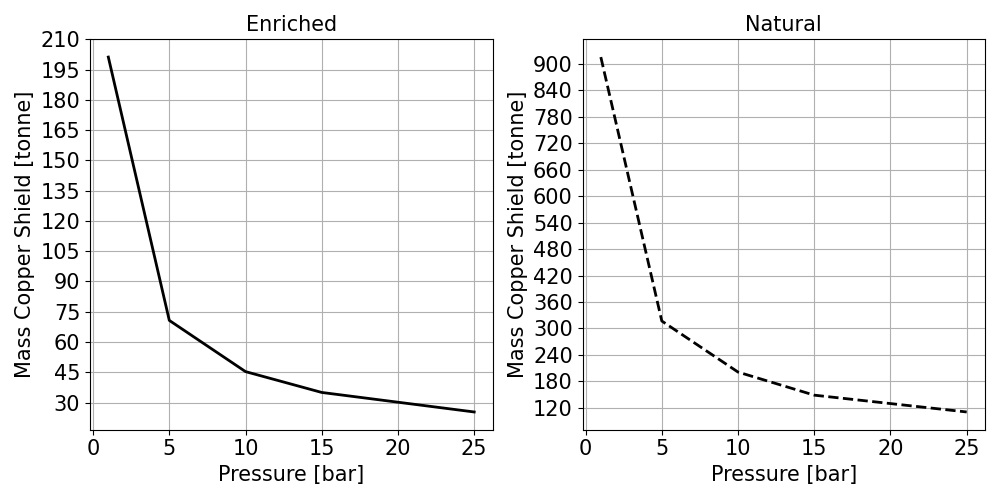

In [10]:
# Plot the number of events interacting in the window vs mass Cu
pressures = [1, 5, 10, 15, 25]
def CalcMass(det_size):
    rho_Cu   = 8960 # kg/m^3x``
    return rho_Cu * ( (det_size+12e-2)**3 - det_size**3 )

def CalcMassCylinder(det_size, thick):
    rho_Cu   = 8960 # kg/m^3x
    return np.pi*0.25*rho_Cu * ( (det_size+2*thick)**3 - det_size**3 )


MCu = np.array([6.182, 3.615, 2.870, 2.507, 2.114])
MCu = CalcMassCylinder(MCu, 12e-2)

MCu_nat = np.array([13.319, 7.789, 6.182, 5.301, 4.556])
MCu_nat = CalcMassCylinder(MCu_nat, 12e-2)


fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].plot(pressures, MCu/1e3, label = "Enriched Xe 1-t", color="k", linewidth=2)
ax[1].plot(pressures, MCu_nat/1e3, label = "Natural Xe 10-t", color="k", linewidth=2, linestyle="--")
ax[0].set_xlabel("Pressure [bar]", fontsize=15)
ax[0].set_ylabel("Mass Copper Shield [tonne]", fontsize=15)
ax[0].set_title("Enriched", fontsize=15)
ax[0].yaxis.set_major_locator(ticker.MaxNLocator(nbins=15))
ax[0].grid()
ax[0].tick_params(axis='both', which='both', labelsize=15)
ax[1].set_xlabel("Pressure [bar]", fontsize=15)
ax[1].set_ylabel("Mass Copper Shield [tonne]", fontsize=15)
ax[1].set_title("Natural", fontsize=15)
ax[1].yaxis.set_major_locator(ticker.MaxNLocator(nbins=15))
ax[1].grid()
ax[1].tick_params(axis='both', which='both', labelsize=15)
plt.tight_layout()
plt.savefig(f"../../../Projects/Atmospheric TPC/PaperDraft/Mass_Copper.pdf")